In [1]:
# -*- coding: utf-8 -*-

#construction des dictionnaires noms et nafs dont les clés sont les SIREN

i=0

noms={}
nafs={}
dates={}

siren1=open('basesiren1.txt', 'r', encoding='utf-8')
for line in siren1 :
  lst=line.strip().split(',')
  siren=lst[0]
  if lst[17]=='NAFRev2' :
    noms[siren]=lst[8]
    nafs[siren]=lst[16]
    dates[siren]=lst[1][:4]
siren1.close()

siren2=open('basesiren2.txt', 'r', encoding='utf-8')
for line in siren2 :
  lst=line.strip().split(',')
  siren=lst[0]
  if lst[17]=='NAFRev2' :
    noms[siren]=lst[8]
    nafs[siren]=lst[16]
    dates[siren]=lst[1][:4]
siren2.close()

siren3=open('basesiren3.txt', 'r', encoding='utf-8')
for line in siren3 :
  lst=line.strip().split(',')
  siren=lst[0]
  if lst[17]=='NAFRev2' :
    noms[siren]=lst[8]
    nafs[siren]=lst[16]
    dates[siren]=lst[1][:4]
siren3.close()

siren4=open('basesiren4.txt', 'r', encoding='utf-8')
for line in siren4 :
  lst=line.strip().split(',')
  siren=lst[0]
  if lst[17]=='NAFRev2' :
    noms[siren]=lst[8]
    nafs[siren]=lst[16]
    dates[siren]=lst[1][:4]
siren4.close()

siren5=open('basesiren5.txt', 'r', encoding='utf-8')
for line in siren5 :
  lst=line.strip().split(',')
  siren=lst[0]
  if lst[17]=='NAFRev2' :
    noms[siren]=lst[8]
    nafs[siren]=lst[16]
    dates[siren]=lst[1][:4]
siren5.close()



In [2]:
import pandas as pd

#lecture de la table NAF X tags DR et construction d'une matrice sous forme de dictionnaire

df=pd.read_excel('file2.xlsx')

df=df.set_index('Code NAF principal')

In [43]:
dfnaf=pd.read_excel('siren-par-homonymie.xlsx')

for i in dfnaf.index.to_list() :
    codenaf=nafs[str(dfnaf.loc[i,"SIREN"])]
    dfnaf.loc[i, "code naf"]=codenaf
    dfnaf.loc[i, "code naf principal"]=codenaf[:2]
    
dfnaf.to_excel("homonymes.xlsx")

In [3]:
df

,wellness beauty,fintech,home living,health,energy,music,legal,food,event tech,transportation,...,media,kids,travel,security,sports,fashion,gaming,telecom,hosting,dating
Code NAF principal,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,3,6,1,0,0,45,0,2,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
93,2,0,4,0,0,2,0,1,1,3,...,1,0,3,0,17,1,4,0,0,0
94,0,1,5,2,0,0,1,2,2,6,...,1,0,0,0,4,0,1,0,0,0


In [4]:
tags=df.columns.to_list()
NAF=df.index.to_list()

A={}
for tag in tags :
  for naf in NAF :
    A[(naf, tag)]=df.loc[naf, tag]

In [5]:
#on crée un dictionnaire où les clés sont les naf et les valeurs sont les listes ordonnées dans l'ordre décroissant de tags pour ce naf.

def insert(tag, naf, lst_tags): #insère un tag dans une liste de tags dont les A sont triés par ordre croissant
  for i in range(len(lst_tags)) :
    if A[(naf,tag)]>A[(naf,lst_tags[i])] :
      lst_tags.insert(i,tag)
      return

  lst_tags.append(tag)  

def tri(naf) :
  copy_tags=[]
  for tag in tags :
    insert(tag, naf, copy_tags)

  return copy_tags



tagspournaf={} #dictionnaire en question

for naf in NAF :
  tagspournaf[naf]=tri(naf)

In [6]:
tagspournaf[62]

['enterprise software',
 'marketing',
 'transportation',
 'fintech',
 'health',
 'jobs recruitment',
 'media',
 'security',
 'real estate',
 'food',
 'education',
 'home living',
 'travel',
 'telecom',
 'sports',
 'legal',
 'event tech',
 'energy',
 'gaming',
 'hosting',
 'robotics',
 'fashion',
 'wellness beauty',
 'music',
 'semiconductors',
 'kids',
 'dating']

In [7]:
tagspournaf[68]

['real estate',
 'transportation',
 'fintech',
 'home living',
 'marketing',
 'travel',
 'energy',
 'music',
 'food',
 'event tech',
 'jobs recruitment',
 'enterprise software',
 'fashion',
 'wellness beauty',
 'health',
 'legal',
 'robotics',
 'education',
 'semiconductors',
 'media',
 'kids',
 'security',
 'sports',
 'gaming',
 'telecom',
 'hosting',
 'dating']

0 1


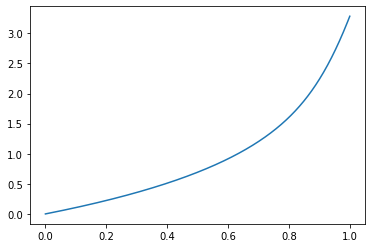

1 5


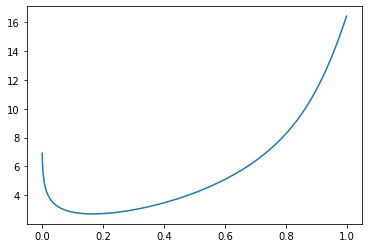

3 3


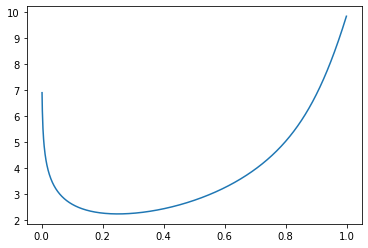

9 0


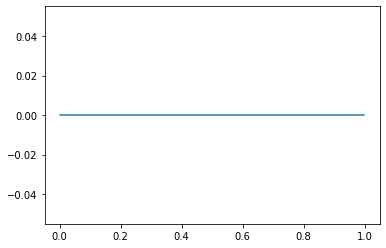

10 59


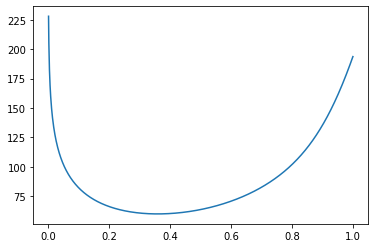

11 9


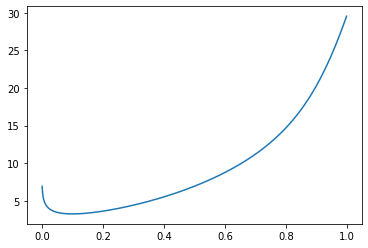

13 6


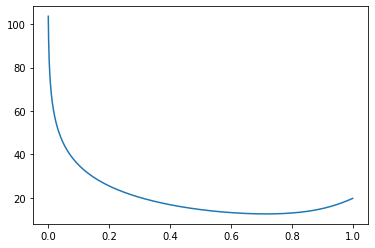

14 16


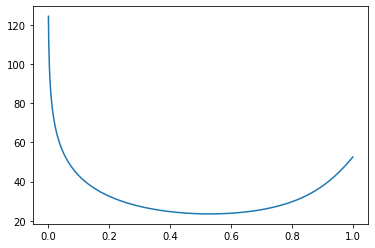

15 14


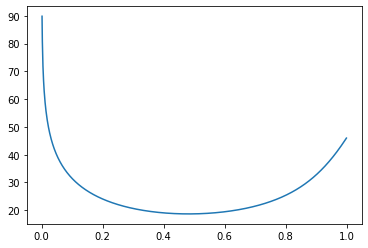

16 8


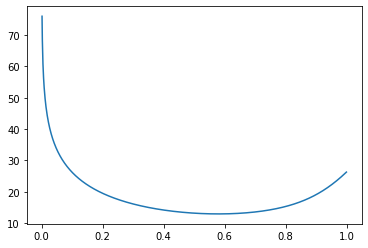

17 7


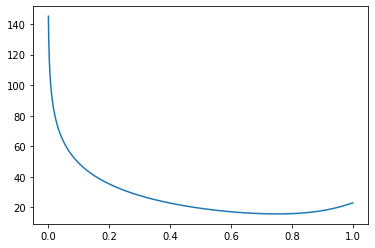

18 5


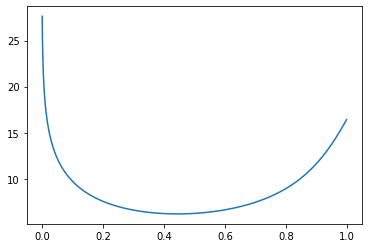

20 12


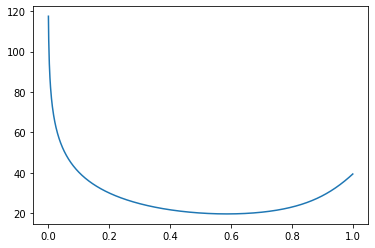

21 1


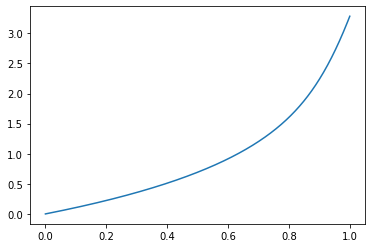

22 7


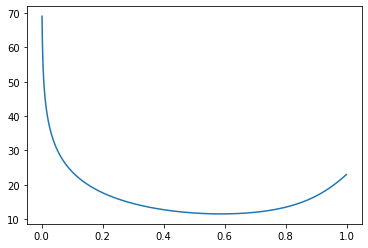

23 7


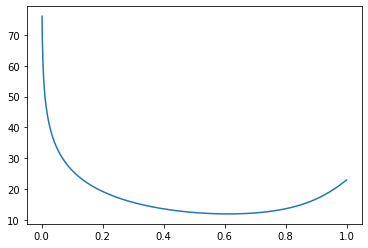

24 1


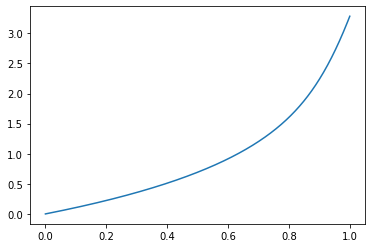

25 8


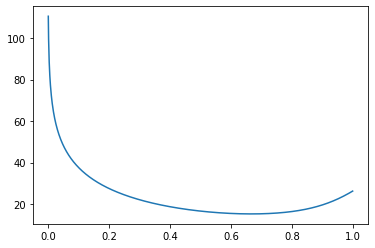

26 74


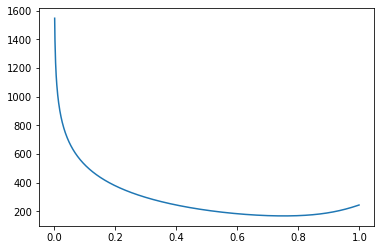

27 10


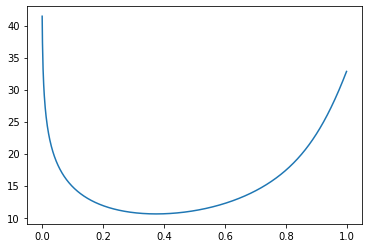

28 38


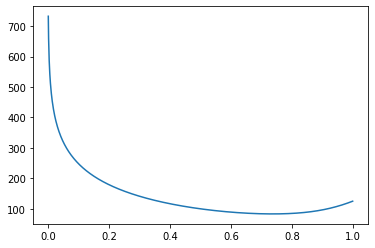

29 4


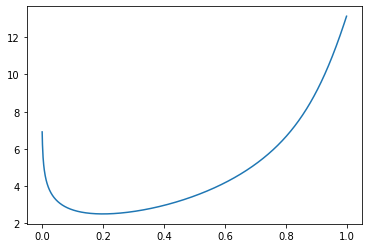

30 25


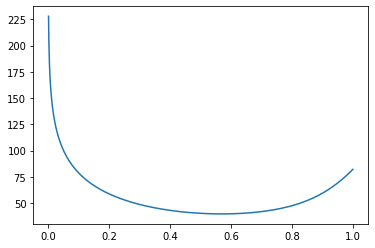

31 9


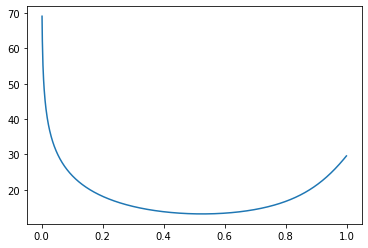

32 38


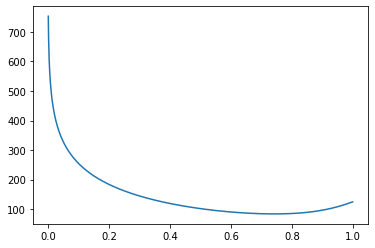

33 13


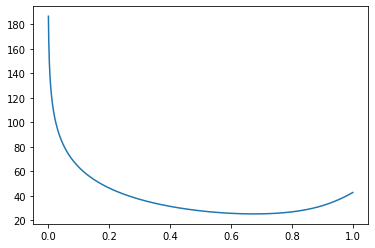

35 18


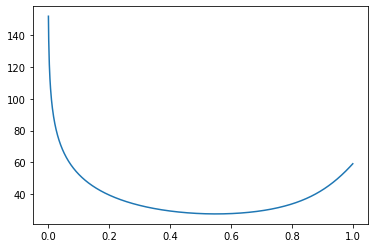

38 11


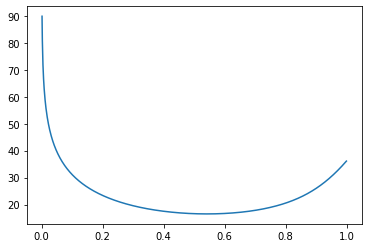

39 3


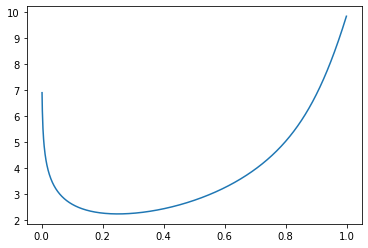

41 8


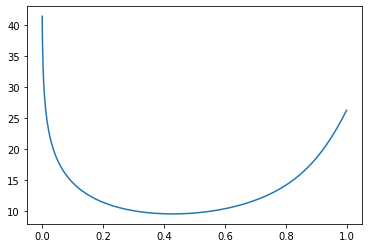

42 3


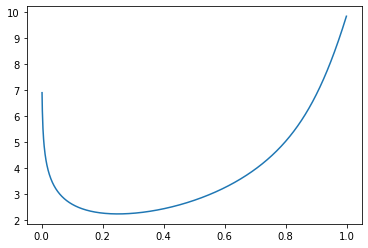

43 22


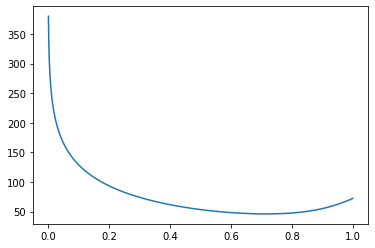

45 28


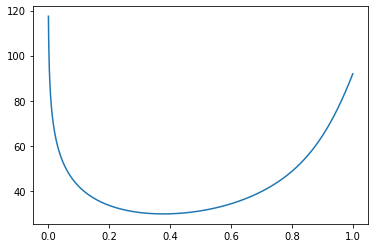

46 287


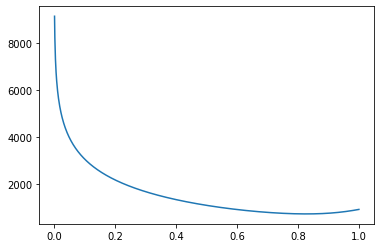

47 465


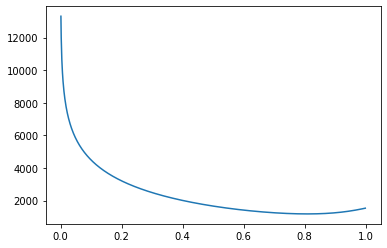

49 17


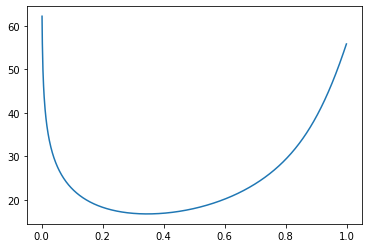

51 2


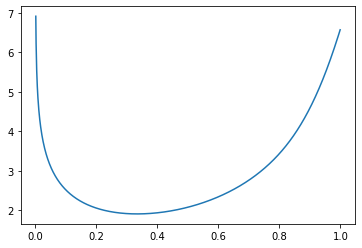

52 19


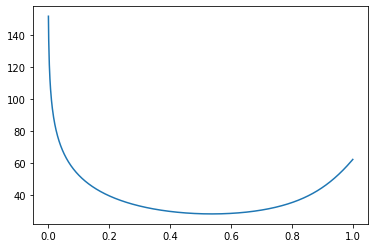

53 4


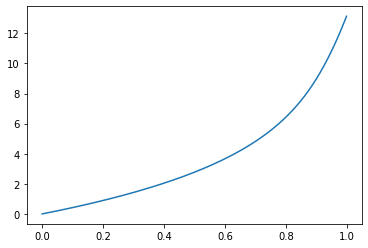

55 13


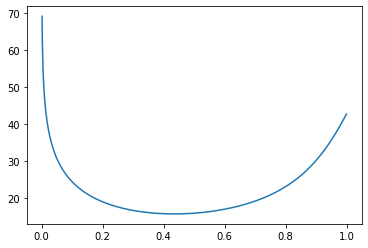

56 44


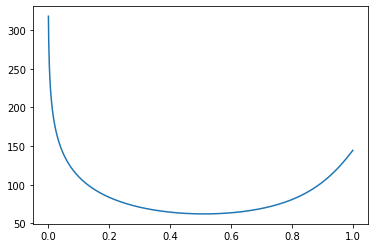

57 1


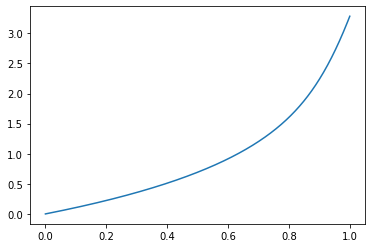

58 610


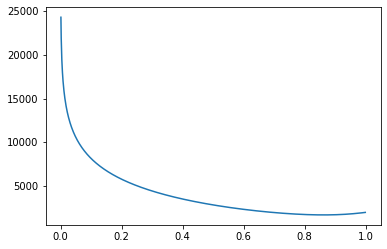

59 64


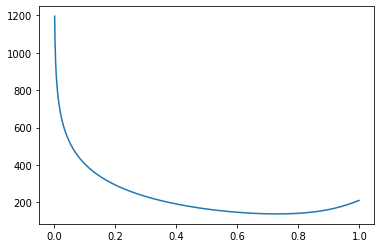

60 5


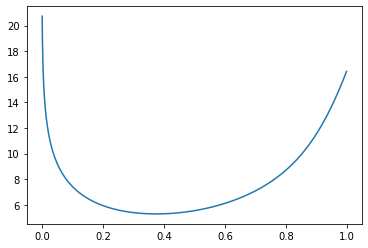

61 44


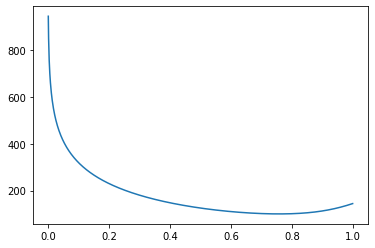

62 1531


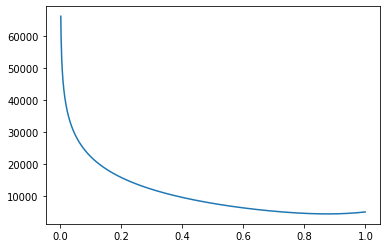

63 654


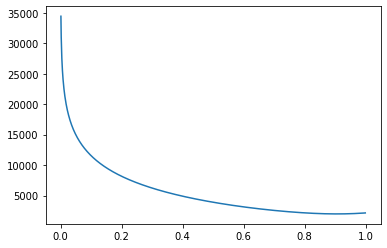

64 109


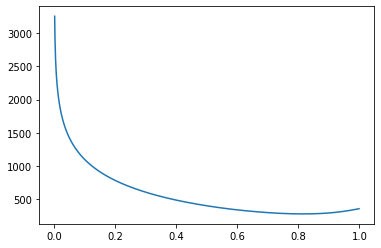

65 6


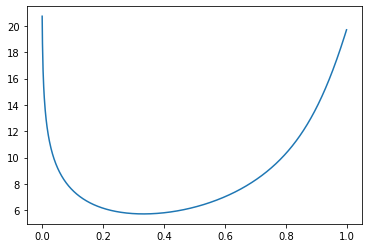

66 122


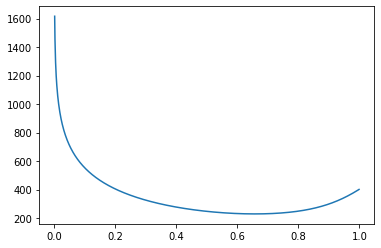

68 86


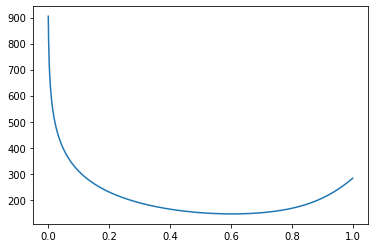

69 27


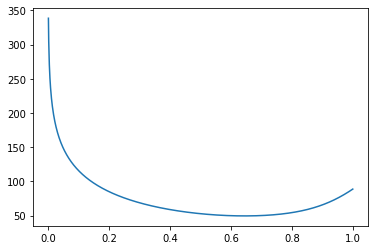

70 426


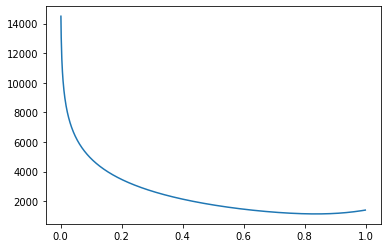

71 270


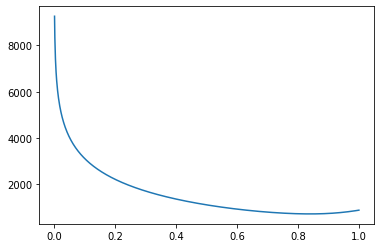

72 181


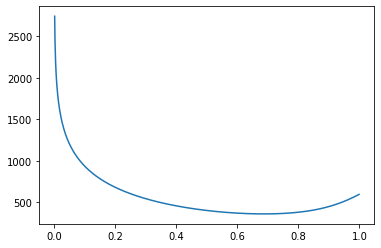

73 114


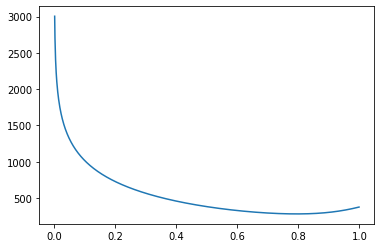

74 156


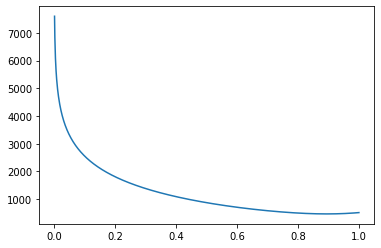

75 1


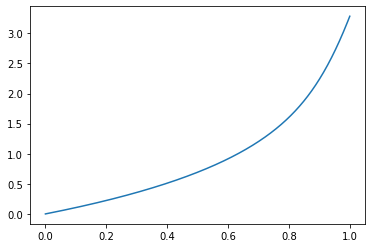

77 52


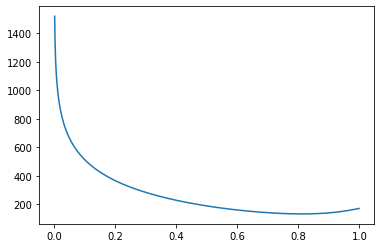

78 20


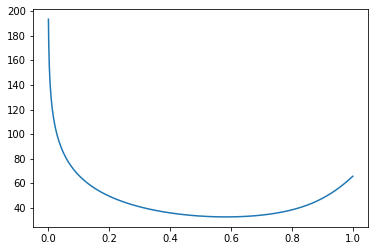

79 53


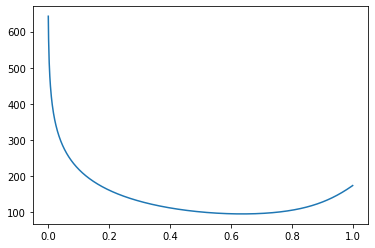

80 1


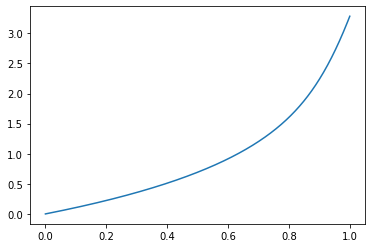

81 6


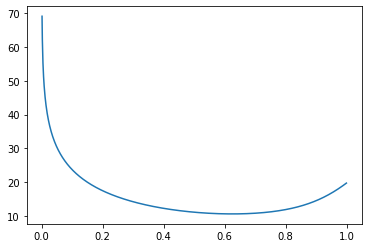

82 147


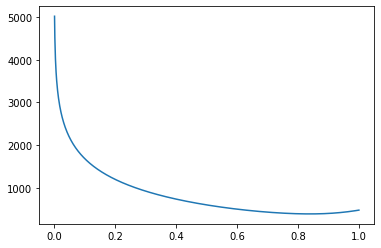

84 2


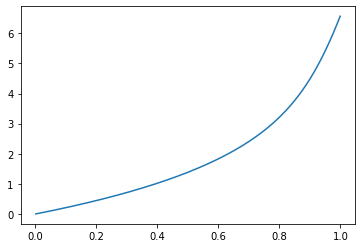

85 97


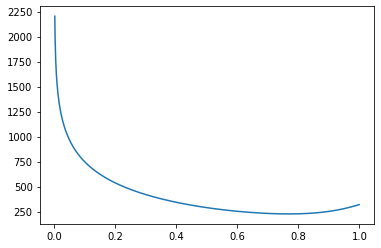

86 2


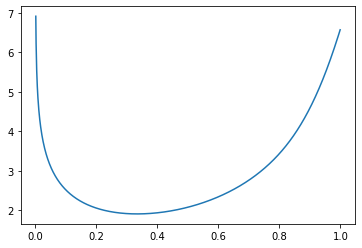

87 2


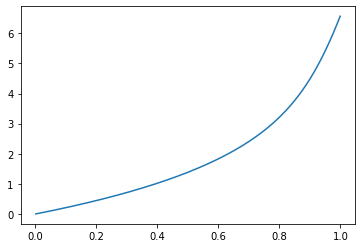

88 32


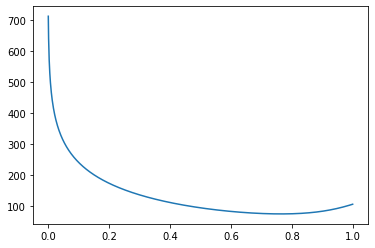

90 10


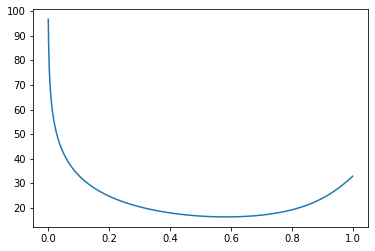

92 3


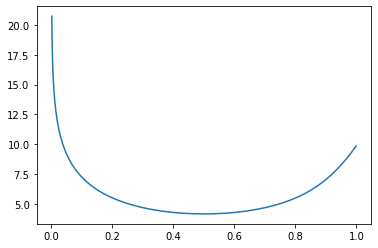

93 44


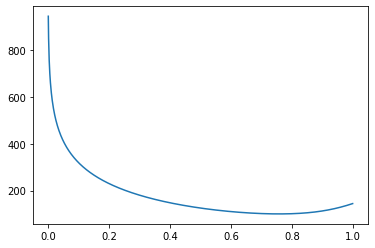

94 36


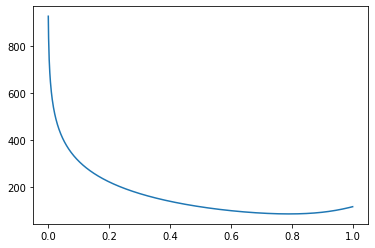

95 13


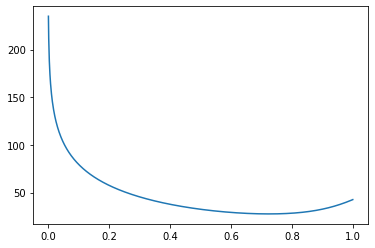

96 16


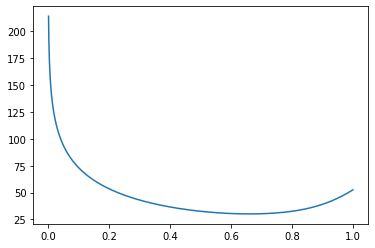

In [8]:
from scipy.optimize import fmin 
from math import log
import matplotlib.pyplot as plt
import numpy as np

for naf in NAF :
  lst_tags=tagspournaf[naf]
  n=len(lst_tags)
  N=0
  N2=0
  for k in range(n) :
    tag=lst_tags[k]
    N+=A[(naf,tag)]
    N2+=A[(naf,tag)]*k

  def fct(a) :
    return -N2*log(a) - N *log(1-a) + N*log(1-a**n)

  liste=np.linspace(0.001,0.999,1000)
  valeurs = [fct(a) for a in liste]
  print(naf, N)
  plt.plot(liste,valeurs)
  plt.show()
  plt.close()

In [9]:
from scipy.optimize import fmin 
from math import log

def param(naf) : #choix du paramètre de la loi de proba pour chaque naf
  lst_tags=tagspournaf[naf]
  n=len(lst_tags)
  N=0
  N2=0
  for k in range(n) :
    tag=lst_tags[k]
    N+=A[(naf,tag)]
    N2+=A[(naf,tag)]*k

  def fct(a) :
    return -N2*log(a) - N *log(1-a) + N*log(1-a**n)

  lst=[0.1, 0.3, 0.5, 0.7, 0.9]

  a="pas de paramètre optimal"
  for val in lst :
    try :
      a=fmin(fct,val)

    except :
      pass

  return a , N

dico_param={}
eff={}

for naf in NAF :
  dico_param[naf],eff[naf]=param(naf)

def f(naf,tag) :
  a=dico_param[naf]
  k=tagspournaf[naf].index(tag)

  if a == "pas de paramètre optimal" :
    return "NON"
    
  return a**k * (1-a)/(1-a**eff[naf])

Optimization terminated successfully.
         Current function value: 2.703367
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 2.703367
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 2.249341
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 2.249341
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 2.249341
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 7
         Function evaluations: 20
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 9
         Function evaluations: 26
Optimization terminated successfully

Optimization terminated successfully.
         Current function value: 28.309179
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 15.746174
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: 15.746174
         Iterations: 13
         Function evaluations: 26
Optimization terminated successfully.
         Current function value: 15.746174
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 15.746174
         Iterations: 14
         Function evaluations: 28
Optimization terminated successfully.
         Current function value: 15.746174
         Iterations: 15
         Function evaluations: 30
Optimization terminated successfully.
         Current function value: 62.361022
         Iterations: 18
         Function evaluations: 36
Optimization terminated suc

In [10]:
for key in dico_param :
  print (key , ':' , dico_param[key], ';', eff[key])

0 : pas de paramètre optimal ; 1
1 : [0.16664062] ; 5
3 : [0.25] ; 3
9 : [0.9] ; 0
10 : [0.35868164] ; 59
11 : [0.1] ; 9
13 : [0.71455078] ; 6
14 : [0.52945313] ; 16
15 : [0.48146484] ; 14
16 : [0.57893555] ; 8
17 : [0.75076172] ; 7
18 : [0.44446289] ; 5
20 : [0.58623047] ; 12
21 : pas de paramètre optimal ; 1
22 : [0.58825195] ; 7
23 : [0.61110352] ; 7
24 : pas de paramètre optimal ; 1
25 : [0.66673828] ; 8
26 : [0.75243164] ; 74
27 : [0.3750293] ; 10
28 : [0.73661133] ; 38
29 : [0.2] ; 4
30 : [0.56900391] ; 25
31 : [0.52628906] ; 9
32 : [0.74206055] ; 38
33 : [0.67508789] ; 13
35 : [0.55001953] ; 18
38 : [0.54166992] ; 11
39 : [0.25] ; 3
41 : [0.42855469] ; 8
42 : [0.25] ; 3
43 : [0.71455078] ; 22
45 : [0.37775391] ; 28
46 : [0.82643555] ; 287
47 : [0.80885742] ; 465
49 : [0.34617187] ; 17
51 : [0.33332031] ; 2
52 : [0.53657227] ; 19
53 : pas de paramètre optimal ; 4
55 : [0.43479492] ; 13
56 : [0.51108398] ; 44
57 : pas de paramètre optimal ; 1
58 : [0.86255859] ; 610
59 : [0.730371

In [11]:
#score de compatibilité entre un code naf et une série de tags, fondés sur les données de l'échantillon de départ.

def newscore(naf, lst_tags) : #score de compatibilité entre un code naf et un ensemble de tags
  if naf not in NAF :
    return 0

  elif dico_param[naf] == "pas de paramètre optimal" :
    return 0 #à modifier

  else :
    produit = 1
    for tag in lst_tags :
      produit = produit * f(naf,tag) 

    return produit


In [12]:
#fonction qui prend un nom DR et sa série de tags, et cherche ses homonymes dans la base sirène. 
#calcule les scores de compatibilité avec tous les homonymes, et choisit celui présentant une compatibilité maximale. 

annee='2020'

def newtrouvesiren(NOM, TAGS) :
  siren_local = []
  for siren, nom in noms.items() :
    if nom==NOM and dates[siren]==annee :
      siren_local.append(siren)

  scoreinit=0
  res='indéterminable'
  for siren in siren_local :

    test=newscore(int(nafs[siren][:2]), TAGS)
    if test > scoreinit :
        scoreinit=test
        res=siren

 #     elif test == scoreinit :
 #       if date[siren][:4]==annee :
 #         scoreinit=test
 #         res=siren

    
  return res



In [13]:
#file=pd.read_excel('nomtagDR2020.xlsx')
#file

In [18]:
for j in range(2022,2023) :
    nomfichier='nomtagDR'+str(j)+'.xlsx'
    nomnouveaufichier='nomsiren_tagDR'+str(j)+'_maxvraisemblance.txt'


    file=pd.read_excel(nomfichier)
    extranewfile=open(nomnouveaufichier, 'w')

    for i in file.index.to_list() :
      print(i)
      NOM = file.loc[i,'nom'].upper()
      TAGS = file.loc[i, 'industries'].split(';')

      extranewfile.write(';'.join([file.loc[i,'nom'], newtrouvesiren(NOM,TAGS)]))
      extranewfile.write('\n')

    extranewfile.close()
    

0
1
2
3
4
5
6
7


/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys
/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
28

734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
23

In [ ]:
NOM='MANTRA'
TAGS=['security']

#NOM='JOE'
#TAGS=['fintech']

siren_local = []
for siren, nom in noms.items() :
  if nom==NOM :
    siren_local.append(siren)

scoreinit=0
res='indéterminable'
for siren in siren_local :
  test=newscore(int(nafs[siren][:2]), TAGS)
  print(siren, int(nafs[siren][:2]), test)
  if test > scoreinit :
    scoreinit=test
    res=siren


In [23]:
f(62,'security')

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([0.04908658])

In [24]:
f(62,'dating')

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([0.00392308])

In [25]:
f(62,'security')*f(62,'dating')

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([0.00019257])

In [26]:
f(62,'security')>f(62,'dating')

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([ True])

In [27]:
newscore(62, ['security'])

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys
/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([0.04908658])

In [ ]:
62 in NAF

/opt/conda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


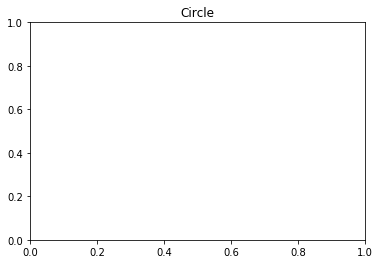

In [38]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
draw_circle = plt.Circle((62, 4), f(62,'security')[0])

axes.add_artist(draw_circle)
plt.title('Circle')
plt.show()

In [48]:
df2011=pd.read_excel('DR2011.xlsx')

for i in df2011.index.to_list() :
    if str(df2011.loc[i,'SIREN']) in nafs :
        df2011.loc[i,'NAF']=nafs[str(df2011.loc[i,'SIREN'])]
        df2011.loc[i,'NAF reduit']=nafs[str(df2011.loc[i,'SIREN'])]

In [49]:
df2011.to_excel('new2011.xlsx')